<p>
  <b>AI Lab: Deep Learning for Computer Vision</b><br>
  <b><a href="https://www.wqu.edu/">WorldQuant University</a></b>
</p>

<div class="alert alert-success" role="alert">
  <p>
    <center><b>Usage Guidelines</b></center>
  </p>
  <p>
    This file is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International</a>.
  </p>
  <p>
    You <b>can</b>:
    <ul>
      <li><span style="color: green">✓</span> Download this file</li>
      <li><span style="color: green">✓</span> Post this file in public repositories</li>
    </ul>
    You <b>must always</b>:
    <ul>
      <li><span style="color: green">✓</span> Give credit to <a href="https://www.wqu.edu/">WorldQuant University</a> for the creation of this file</li>
      <li><span style="color: green">✓</span> Provide a <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link to the license</a></li>
    </ul>
    You <b>cannot</b>:
    <ul>
      <li><span style="color: red">✗</span> Create derivatives or adaptations of this file</li>
      <li><span style="color: red">✗</span> Use this file for commercial purposes</li>
    </ul>
  </p>
  <p>
    Failure to follow these guidelines is a violation of your terms of service and could lead to your expulsion from WorldQuant University and the revocation your certificate.
  </p>
</div>

### Getting Ready

Let's start by importing the packages we need.

In [1]:
import shutil
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import PIL
import torch
import torchvision
from facenet_pytorch import MTCNN
from PIL import Image
from torchvision.utils import make_grid

We'll also print out the version numbers for our libraries, including Python. This way anyone who reviews our work knows exactly what software we used in case they want to reproduce our analysis.

In [2]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("torch version : ", torch.__version__)
print("torchvision version : ", torchvision.__version__)
print("PIL version : ", PIL.__version__)

Platform: linux
Python version: 3.11.0 (main, Nov 15 2022, 20:12:54) [GCC 10.2.1 20210110]
---
torch version :  2.2.2+cu121
torchvision version :  0.17.2+cu121
PIL version :  10.2.0


Let's also make use of GPUs, so the device should be `cuda`.

In [3]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Using {device} device.")

Using cuda device.


### Initializing a MTCNN model

We'll perform face detection using a MTCNN network from `facenet_pytorch` library. This model is able to simultaneously propose bounding boxes of faces, determine detection probabilities, and detect facial landmarks like eyes, nose and mouth.

Let's start by initializing the model. Here are a couple of arguments we get to set:
- `device`: The device on which to run the model. 
- `keep_all`: A boolean determining if all detected faces are returned or not.
- `min_face_size`: Minimum face size (in pixels) to search for in the image.
- `post_process`: A boolean determining if we want image standardization of detected faces. This is advised before proceeding with face recognition models, but if we want face images that are returned to us to look normal to the human eye, we can set `post_process=False`.


**Task 4.3.1:** Initialize a MTCNN model. Make sure to use a GPU, keep all detected faces and set minimum face size to search for to be 60.

In [4]:
MTCNN?

Init signature:
MTCNN(
    image_size=160,
    margin=0,
    min_face_size=20,
    thresholds=[0.6, 0.7, 0.7],
    factor=0.709,
    post_process=True,
    select_largest=True,
    selection_method=None,
    keep_all=False,
    device=None,
)
Docstring:     
MTCNN face detection module.

This class loads pretrained P-, R-, and O-nets and returns images cropped to include the face
only, given raw input images of one of the following types:
    - PIL image or list of PIL images
    - numpy.ndarray (uint8) representing either a single image (3D) or a batch of images (4D).
Cropped faces can optionally be saved to file
also.

Keyword Arguments:
    image_size {int} -- Output image size in pixels. The image will be square. (default: {160})
    margin {int} -- Margin to add to bounding box, in terms of pixels in the final image. 
        Note that the application of the margin differs slightly from the davidsandberg/facenet
        repo, which applies the margin to the original image before r

In [5]:
mtcnn = MTCNN(device=device, keep_all=True, min_face_size=60, post_process=False)

print(mtcnn)

MTCNN(
  (pnet): PNet(
    (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=10)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=16)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (prelu3): PReLU(num_parameters=32)
    (conv4_1): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
    (softmax4_1): Softmax(dim=1)
    (conv4_2): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (rnet): RNet(
    (conv1): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=28)
    (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=48)
    (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv3): Conv2d(48, 64,

Now let's get an image that we'll work with. In the previous lesson, we extracted some frames from the video interview with Mary Kom. Those images are in directory `project4`. In there we created a subdirectory `data` within which we have the `extracted_frames` subdirectory.

**Task 4.3.2:** Create a variable for the current working directory using `pathlib` syntax.

In [6]:
curr_work_dir = Path.cwd()

print(curr_work_dir)

/app


**Task 4.3.3:** Create an absolute path for the `extracted_frames` directory using the `pathlib` syntax.

In [7]:
extracted_frames_dir = curr_work_dir / "project4" / "data" / "extracted_frames"

print(extracted_frames_dir)

/app/project4/data/extracted_frames


**Task 4.3.4:** Create a file path to the sample image we'll be working with. The image is in the `extracted_frames` directory. 

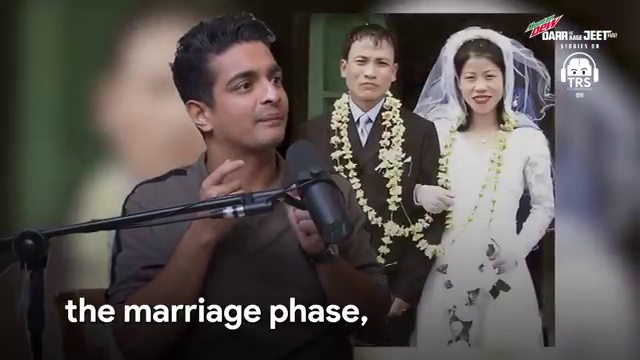

In [8]:
sample_image_filename = "frame_320.jpg"
sample_image_path = extracted_frames_dir / sample_image_filename

sample_image = Image.open(sample_image_path)
sample_image

Well done! We now have a sample image with several human faces. Let's detect them!

### Bounding Boxes of Detected Faces

If we want to detect faces and obtain their bounding boxes, we need to use the `detect` method on the MTCNN model and pass in the sample image. This returns both the bounding boxes of detected faces as well as the predicted probability that the object in a given bounding box is indeed a face.

**Task 4.3.5:** Use the `detect` method on the MTCNN model we initialized in one of the previous tasks. Make sure to pass in the `sample_image`.

In [9]:
boxes, probs = mtcnn.detect(sample_image)

print("boxes type:", type(boxes))
print("probs type:", type(probs))

boxes type: <class 'numpy.ndarray'>
probs type: <class 'numpy.ndarray'>


Great! We now have two arrays. Array `boxes` contains the bounding boxes of the detected faces and `probs` contains the probabilities.

Let's look at the `boxes` array first.

In [10]:
print(boxes)
print(boxes.shape)

[[211.4107208251953 46.25676345825195 285.15838623046875
  146.4738311767578]
 [346.31689453125 40.236629486083984 392.3767395019531 99.2223892211914]
 [458.0262756347656 55.83146667480469 502.13848876953125
  112.0572280883789]]
(3, 4)


**Task 4.3.6:** Using `boxes`, compute how many faces were detected in the sample image.

In [15]:
number_of_detected_faces = len(boxes)

print(number_of_detected_faces)

3


If we again look at the image we're working with, we can indeed see three faces. We're on the right path!

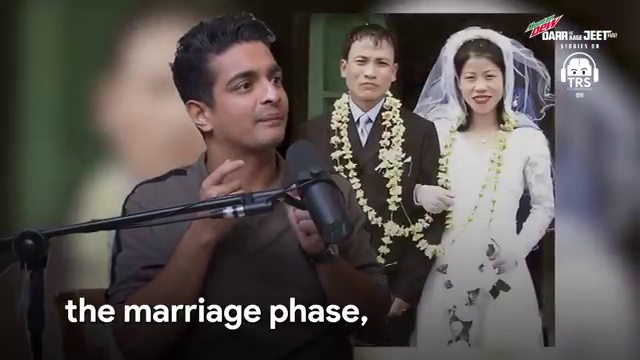

In [12]:
sample_image

Now let's investigate the probabilities that the model returned.

**Task 4.3.7:** Using `probs`, determine for how many of the faces detected did the model predict with at least 99% probability that it's a face.

In [16]:
num_faces = len(probs[probs > 0.99])

print(num_faces)

3


Looks like the model is very certain that all of the detected faces are indeed faces!

Now let's plot the bounding boxes together with the sample image.

**Task 4.3.8:** Fill in the missing code below to iterate over all of the bounding boxes and plot them on top of the sample image.

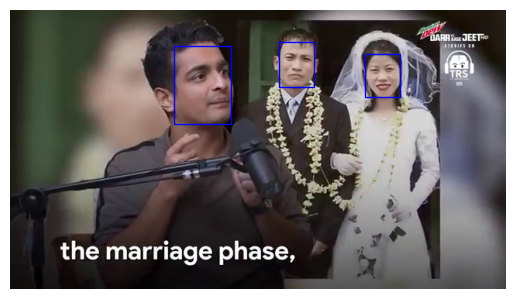

In [17]:
fig, ax = plt.subplots()
ax.imshow(sample_image)

for box in boxes:
    rect = plt.Rectangle(
        (box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color="blue"
    )
    ax.add_patch(rect)
plt.axis("off");

Looks good! 

### Extracting Facial Landmarks

MTCNN not only detects faces but can also mark facial landmarks such as eyes, nose, and mouth in each detected face. 

The way to obtain the facial landmarks together with bounding boxes and probabilities is to again use the `detect` method on the MTCNN model. But this time together with the sample image, we need to pass in `landmarks=True`.

**Task 4.3.9:** Use the `detect` method on the MTCNN model such that we'll get bounding boxes, probabilities and facial landmarks returned.

In [18]:
boxes, probs, landmarks = mtcnn.detect(sample_image, landmarks=True)

print("boxes type:", type(boxes))
print("probs type:", type(probs))
print("landmarks type:", type(landmarks))

boxes type: <class 'numpy.ndarray'>
probs type: <class 'numpy.ndarray'>
landmarks type: <class 'numpy.ndarray'>


The facial landmarks detected by the model on each face are:
- left eye,
- right eye,
- nose,
- left mouth corner,
- right mouth corner.

Let's make sure that the shape of the landmarks array matches what we'd expect given that six faces were detected.

**Task 4.3.10:** Print the shape of the landmarks array returned by the model.

In [19]:
print(landmarks.shape)

(3, 5, 2)


Great! We have 3 faces detected and on each face, we have 5 facial landmarks and 2 coordinates locating each landmark. 

**Task 4.3.11:** Fill in the missing code to plot the bounding boxes as well as the facial landmarks on top of the sample image. We recommend using `zip` on `boxes` and `landmarks` in the `for` loop that you need to fill in.

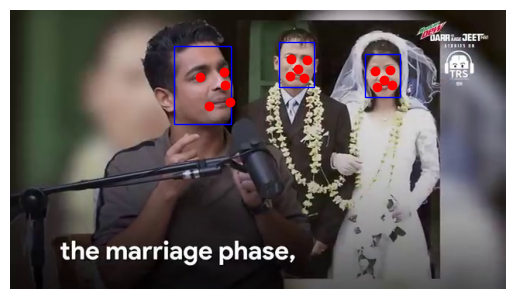

In [20]:
fig, ax = plt.subplots()
ax.imshow(sample_image)

for box, landmark in zip(boxes, landmarks):
    rect = plt.Rectangle(
        (box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color="blue"
    )
    ax.add_patch(rect)
    for point in landmark:
        ax.plot(point[0], point[1], marker="o", color="red")
plt.axis("off");

### Cropping out Detected Faces

If we wanted to proceed with further face analysis like for example perform face recognition, it's a good idea to crop out the detected faces. That way further analysis can focus only on the relevant parts of the image. 

So let's learn how we can crop out the detected faces!

In order to get the PyTorch tensors of the detected faces instead of the bounding boxes, we need to call the MTCNN object directly and just pass in the image we're working with.

**Task 4.3.12:** Use the MTCNN model that we initialized in the first task and pass it the `sample_image`.

In [21]:
faces = mtcnn(sample_image)

print(faces.shape)

torch.Size([3, 3, 160, 160])


Looks like this returned three small images, each with 3 color channels and 160 width and 160 height. Let's plot these 3 images!

**Task 4.3.13:** Create a grid of these three images by using `make_grid` from `torchvision.utils` and passing in `faces`. Use `nrow=3` so we'll have all 3 images in one row. 

In [23]:
Grid = make_grid(faces, nrow=3)

print(Grid.shape)

torch.Size([3, 164, 488])


Now let's plot the grid of images!

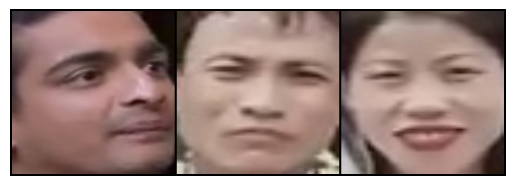

In [24]:
plt.imshow(Grid.permute(1, 2, 0).int())
plt.axis("off");

We obtained the cropped faces that were detected. Hooray!

### Prepare a Subset of Images for Next Steps

To conclude this lesson, we'll prepare a subset of images for the next lesson where we'll work on face embeddings or faceprints. These are numerical representations of a face that are needed for tasks like face recognition or verification.

Let's create a directory of selected images that we'll work with in the next lesson.

**Task 4.3.14:** Make a directory into which we'll put the selected images. Make sure you do it such that no error is raised even if the directory already exists.

In [25]:
images_dir = curr_work_dir / "project4" / "data" / "images"
images_dir.mkdir(exist_ok=True)

**Task 4.3.15:** Make a subdirectory in the `images` directory and call it `mary_kom`. Again make sure you do it such that no error is raised even if the directory already exists.

In [26]:
mary_kom_dir = images_dir / "mary_kom"

# Now Create `mary_kom` directory
mary_kom_dir.mkdir(exist_ok=True)

Good job! The directory you just created will be the directory into which we'll put the selected images. 

Let's make a list of frames that we want to use. 

In [27]:
mary_kom_imgs = [
    "frame_80.jpg",
    "frame_115.jpg",
    "frame_120.jpg",
    "frame_125.jpg",
    "frame_135.jpg",
]

**Task 4.3.16:** Iterate over `mary_kom_imgs` list of image filenames and create a list of absolute paths to each image using `pathlib` syntax. Remember that the images are in the `extracted_frames` directory.

In [28]:
mary_kom_img_paths = [extracted_frames_dir / i for i in mary_kom_imgs]

print("Number of images we'll use:", len(mary_kom_img_paths))

Number of images we'll use: 5


Before we copy these images over to `mary_kom` directory, let's just look at them.

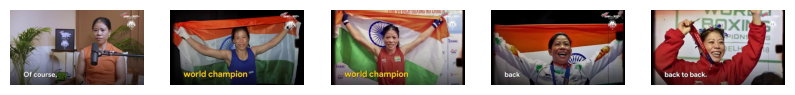

In [29]:
fig, axs = plt.subplots(1, 5, figsize=(10, 8))

for i, ax in enumerate(axs):
    ax.imshow(Image.open(mary_kom_img_paths[i]))
    ax.axis("off")

**Task 4.3.17:** Iterate over `mary_kom_img_paths` in order to copy these selected images into `mary_kom` directory.

In [30]:
for image_path in mary_kom_img_paths:
    shutil.copy(image_path, mary_kom_dir)

In [31]:
print("Number of files in mary_kom directory:", len(list(mary_kom_dir.iterdir())))

Number of files in mary_kom directory: 5


We'll also get some images of the interviewer, so we'll have more than one face we can potentially identify. We'll call that directory `ranveer`, since that's the interviewer's first name.

**Task 4.3.18:** Make a subdirectory in the `images` directory and call it `ranveer`. Again make sure you do it such that no error is raised even if the directory already exists.

In [32]:
ranveer_dir = images_dir / "ranveer"

# Now Create `ranveer` directory
ranveer_dir.mkdir(exist_ok=True)

Let's make another list, this time of images of the interviewer.

In [33]:
ranveer_imgs = [
    "frame_10.jpg",
    "frame_40.jpg",
    "frame_270.jpg",
    "frame_365.jpg",
    "frame_425.jpg",
]

**Task 4.3.19:** Iterate over `ranveer_imgs` list of image filenames and create a list of absolute paths to each image using `pathlib` syntax. Remember that the images are in the `extracted_frames` directory.

In [34]:
ranveer_img_paths = [extracted_frames_dir / i for i in ranveer_imgs]

print("Number of images we'll use:", len(ranveer_img_paths))

Number of images we'll use: 5


Let's take a look at these as well before we copy them to the new directory.

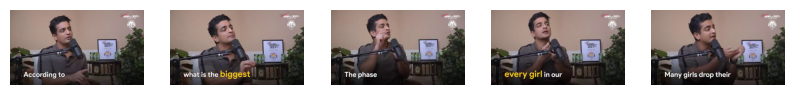

In [35]:
fig, axs = plt.subplots(1, 5, figsize=(10, 8))

for i, ax in enumerate(axs):
    ax.imshow(Image.open(ranveer_img_paths[i]))
    ax.axis("off")

They're all images of just the interviewer, so we're ready to copy them over.

**Task 4.3.20:** Iterate over `ranveer_img_paths` in order to copy these selected images into `ranveer` directory.

In [36]:
for image_path in ranveer_img_paths:
    shutil.copy(image_path, ranveer_dir)

print("Number of files in ranveer directory:", len(list(ranveer_dir.iterdir())))

Number of files in ranveer directory: 5


Great! Now we have a set of images ready for the next lesson.

---
This file &#169; 2024 by [WorldQuant University](https://www.wqu.edu/) is licensed under [CC BY-NC-ND 4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/).